In [1]:
import io
from pathlib import Path 
import zipfile

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from IPython.core.pylabtools import figsize

figsize(8, 8)

In [2]:
datapath = Path("/media/hemu/Data/Markets/FX/truefx/GBPJPY-zip")



In [3]:
def read_and_parse_truefx(filepath):
    df = pd.read_csv(filepath, header=None, parse_dates=True)
    df.columns = ('asset', 'timestamp', 'bid', 'ask')
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    return df.drop('asset', axis=1).set_index('timestamp')

In [4]:
files = list(datapath.iterdir())
print(len(files))

df = read_and_parse_truefx(files[0])

125


/home/hemu/miniconda3/envs/madigan/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


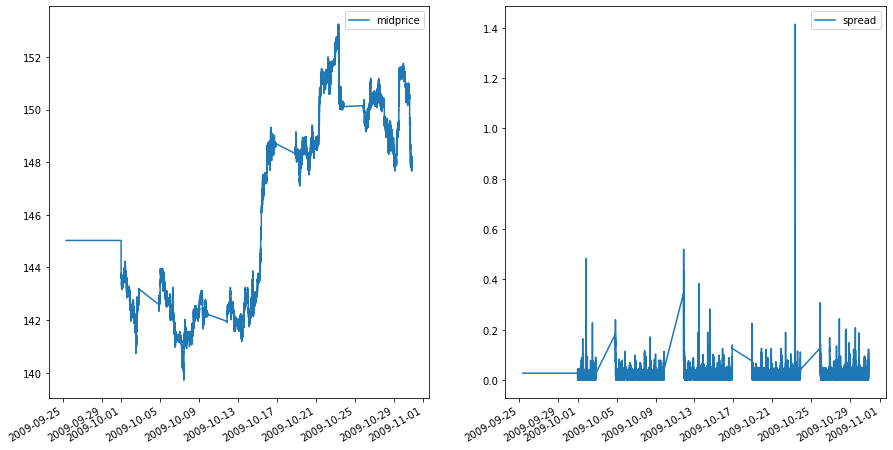

In [8]:
%matplotlib inline

fig, ax = plt.subplots(1, 2, sharex=True, figsize=(15, 8))
ax[0].plot(df[['ask', 'bid']].mean(axis=1), label='midprice')
ax[1].plot(df['ask'] - df['bid'], label='spread')
ax[0].legend()
ax[1].legend()
fig.autofmt_xdate()

In [11]:
x = df[['ask', 'bid']].mean(1).resample('1min')

In [9]:
%matplotlib inline

import scipy.signal as signal
import pywt

In [17]:
print(pywt.families(short=False))

['Haar', 'Daubechies', 'Symlets', 'Coiflets', 'Biorthogonal', 'Reverse biorthogonal', 'Discrete Meyer (FIR Approximation)', 'Gaussian', 'Mexican hat wavelet', 'Morlet wavelet', 'Complex Gaussian wavelets', 'Shannon wavelets', 'Frequency B-Spline wavelets', 'Complex Morlet wavelets']
